In [4]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level
import math

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import ipywidgets as widgets
from ipywidgets import interact_manual

plotting_backend = "plotly-static"

In [5]:
df=pd.read_csv("Google stocks.csv")
df.shape

(5138, 2)

In [6]:
df.columns = ['ds', 'y']

In [7]:
df

,ds,y
0,2004-08-19,2.490186
1,2004-08-20,2.687981
2,2004-08-23,2.715032
3,2004-08-24,2.602609
4,2004-08-25,2.630652
...,...,...
5133,2025-01-13,192.289993
5134,2025-01-14,191.050003
5135,2025-01-15,196.979996
5136,2025-01-16,194.410004


In [8]:
fig = px.line(df, x=df["ds"], y=df["y"])
fig.show()

## Neural Prophet

In [9]:
quantiles = [0.015, 0.985]

params = {
    "n_lags": 24,
    "n_forecasts": 7,
    "n_changepoints": 20,
    "learning_rate": 0.01,
    "ar_layers": [32, 16, 16, 32],
    "epochs": 50,
    "batch_size": 64,
    "quantiles": quantiles,
}


m = NeuralProphet(**params)
m.set_plotting_backend(plotting_backend)
set_log_level("ERROR")

In [10]:
df_train, df_test = m.split_df(df, valid_p=0.1, local_split=False)
print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

Train shape: (4792, 2)
Test shape: (559, 2)


In [11]:
metrics_fit = m.fit(df_train, freq="D", metrics=True)

Training: 0it [00:00, ?it/s]

In [9]:
forecast = m.predict(df_test)

Predicting: 105it [00:00, ?it/s]

In [10]:
fig = go.Figure()
fig.update_layout(title="Neural Prophet with GOOG")
fig.add_trace(go.Scatter(x=df_test['ds'], y=df_test['y'], mode='lines', name='Real Data'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast Data'))
fig.add_trace(go.Scatter(x=df_train['ds'], y=df_train['y'], mode='lines', name='Training'))
fig.show()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(f'R2 Score : {r2_score(forecast.iloc[25:]["y"],forecast.iloc[25:]["yhat1"])}')
print(f'RMSE : {math.sqrt(mean_squared_error(forecast.iloc[25:]["y"],forecast.iloc[25:]["yhat1"]))}')
print(f'MAE : {mean_absolute_error(forecast.iloc[25:]["y"],forecast.iloc[25:]["yhat1"])}')

R2 Score : 0.9831092231153155
RMSE : 3.7780581820218657
MAE : 2.8437961262159663


In [12]:
future=m.make_future_dataframe(df_test,periods=1)
m.predict(future)

Predicting: 105it [00:00, ?it/s]

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,yhat6,yhat7,yhat1 1.5%,...,ar1,ar2,ar3,ar4,ar5,ar6,ar7,trend,season_yearly,season_weekly
0,2024-12-17,197.119995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-12-18,190.149994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-12-19,189.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-20,192.960007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-21,193.970006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-12-22,194.980006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-12-23,195.990005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-12-24,197.570007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-12-25,197.335007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-26,197.100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## LSTM 

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator
 
n_input = 24
n_features = 1
generator = TimeseriesGenerator(df_train['y'],
                                df_train['y'],
                                length=n_input,
                                batch_size=32)
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[2.49018574 2.68798065 2.71503162 2.60260868 2.63065171 2.67805338
 2.63437438 2.53163052 2.54056454 2.48795152 2.51922131 2.48199487
 2.50147688 2.5209589  2.5388279  2.53907561 2.61402416 2.66787791
 2.7669003  2.77955675 2.8284471  2.9158051  2.96221375 2.92449093
 2.68798065 2.71503162 2.60260868 2.63065171 2.67805338 2.63437438
 2.53163052 2.54056454 2.48795152 2.51922131 2.48199487 2.50147688
 2.5209589  2.5388279  2.53907561 2.61402416 2.66787791 2.7669003
 2.77955675 2.8284471  2.9158051  2.96221375 2.92449093 2.93789172
 2.71503162 2.60260868 2.63065171 2.67805338 2.63437438 2.53163052
 2.54056454 2.48795152 2.51922131 2.48199487 2.50147688 2.5209589
 2.5388279  2.53907561 2.61402416 2.66787791 2.7669003  2.77955675
 2.8284471  2.9158051  2.96221375 2.92449093 2.93789172 2.99844742
 2.60260868 2.63065171 2.67805338 2.63437438 2.53163052 2.54056454
 2.48795152 2.51922131 2.48199487 2.50147688 2.5209589  2.5388279
 2.53907561 2.61402416 2.66787791 2.7669003  2.

In [15]:
# define model
model = Sequential()
model.add(LSTM(75, activation='relu',
               input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')
model.summary()
history = model.fit(generator, epochs=60)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75)                23100     
                                                                 
 dense (Dense)               (None, 1)                 76        
                                                                 
Total params: 23176 (90.53 KB)
Trainable params: 23176 (90.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
149/149 [==============================] - 3s 9ms/step - loss: 8.7296
Epoch 2/60
149/149 [==============================] - 1s 9ms/step - loss: 7.6502
Epoch 3/60
149/149 [==============================] - 2s 11ms/step - loss: 3.4516
Epoch 4/60
149/149 [==============================] - 2s 10ms/step - loss: 2.4802
Epoch 5/60
149/149 [==============================] - 2s 10ms/step - loss: 3.3760
Epoch 6/

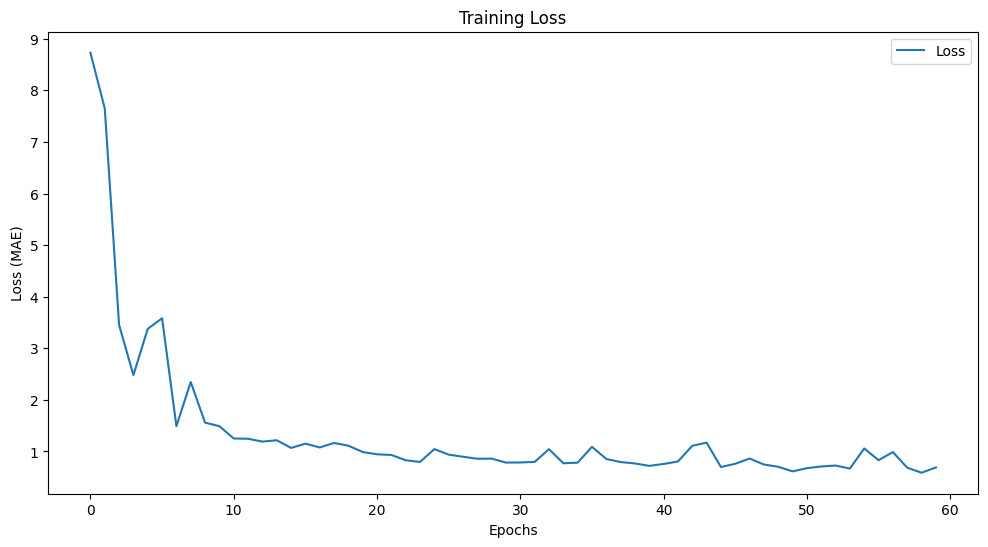

In [16]:
import matplotlib.pyplot as plt
# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.show()

In [12]:
n_input = 24
n_features = 1
test_generator = TimeseriesGenerator(df['y'],
                                df['y'],
                                length=n_input,
                                batch_size=32)

X, y = test_generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

out=model.predict(test_generator)

Given the Array: 
[2.49018574 2.68798065 2.71503162 2.60260868 2.63065171 2.67805338
 2.63437438 2.53163052 2.54056454 2.48795152 2.51922131 2.48199487
 2.5209589  2.5388279  2.53907561 2.61402416 2.66787791 2.7669003
 2.77955675 2.8284471  2.9158051  2.96221375 2.92449093 2.93789172
 2.68798065 2.71503162 2.60260868 2.63065171 2.67805338 2.63437438
 2.53163052 2.54056454 2.48795152 2.51922131 2.48199487 2.5209589
 2.5388279  2.53907561 2.61402416 2.66787791 2.7669003  2.77955675
 2.8284471  2.9158051  2.96221375 2.92449093 2.93789172 2.99844742
 2.71503162 2.60260868 2.63065171 2.67805338 2.63437438 2.53163052
 2.54056454 2.48795152 2.51922131 2.48199487 2.5209589  2.5388279
 2.53907561 2.61402416 2.66787791 2.7669003  2.77955675 2.8284471
 2.9158051  2.96221375 2.92449093 2.93789172 2.99844742 2.97387767
 2.60260868 2.63065171 2.67805338 2.63437438 2.53163052 2.54056454
 2.48795152 2.51922131 2.48199487 2.5209589  2.5388279  2.53907561
 2.61402416 2.66787791 2.7669003  2.77955675 2.8

NameError: name 'model' is not defined

In [18]:
out_test=out[df.shape[0]-df_test.shape[0]-n_input:]
out_test.reshape(-1).shape

(559,)

In [19]:
fig = go.Figure()
fig.update_layout(title="LSTM with GOOG")
fig.add_trace(go.Scatter(x=df_test['ds'], y=df_test['y'], mode='lines', name='Real Data'))
fig.add_trace(go.Scatter(x=df_test['ds'], y=out_test.reshape(-1), mode='lines', name='Forecast Data'))
fig.add_trace(go.Scatter(x=df_train['ds'], y=df_train['y'], mode='lines', name='Training'))
fig.show()

In [20]:
out[4555:].shape,df_test['y'].shape

((559, 1), (559,))

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(f'R2 Score : {r2_score(df_test.y,out[4555:])}')
print(f'RMSE : {math.sqrt(mean_squared_error(df_test.y,out[4555:]))}')
print(f'MAE : {mean_absolute_error(df_test.y,out[4555:])}')

R2 Score : 0.926284368433833
RMSE : 8.13608431338642
MAE : 6.536644357261589


In [23]:
model.save("lstm_goog.keras")

## ARIMA

In [24]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [25]:
def grid_search_arima(data, p_range, d_range, q_range):
    best_score = float('inf')
    best_order = None
    
    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = ARIMA(data, order=(p,d,q))
                    results = model.fit()
                    aic = results.aic
                    if aic < best_score:
                        best_score = aic
                        best_order = (p,d,q)
                except:
                    continue
    return best_order

def rolling_arima_predictions(train_data, test_data, order):
    predictions = []
    history = list(train_data)
    for t in range(len(test_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        pred = model_fit.forecast(steps=1)[0]
        predictions.append(pred)
        history.append(test_data[t])
    return np.array(predictions)

In [26]:
best_order = grid_search_arima(df_train['y'], 
                             p_range=range(0,3), 
                             d_range=range(0,2), 
                             q_range=range(0,3))
print(f"Best ARIMA order: {best_order}")

Best ARIMA order: (2, 1, 2)


In [28]:
arima_preds = rolling_arima_predictions(df_train['y'].values, df_test['y'].values, best_order)

In [29]:
fig = go.Figure()
fig.update_layout(title="Rolling ARIMA with GOOG")
fig.add_trace(go.Scatter(x=df_test['ds'], y=df_test['y'], mode='lines', name='Real Data'))
fig.add_trace(go.Scatter(x=df_test['ds'], y=arima_preds.reshape(-1), mode='lines', name='Forecast Data'))
fig.add_trace(go.Scatter(x=df_train['ds'], y=df_train['y'], mode='lines', name='Training'))
fig.show()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(f'R2 Score : {r2_score(df_test.y,arima_preds)}')
print(f'RMSE : {math.sqrt(mean_squared_error(df_test.y,arima_preds))}')
print(f'MAE : {mean_absolute_error(df_test.y,arima_preds)}')

R2 Score : 0.9929063105081235
RMSE : 2.5238976096530474
MAE : 1.7929693887362192


In [31]:
import pickle
with open("best_order_goog.pkl", "wb") as f:
    pickle.dump(best_order, f)

## HMM

In [35]:
from hmmlearn import hmm

K = 24
NUM_ITERS = 100
STATE_SPACE = range(2, 15)

In [36]:
def get_optimal_states(original_dataset, NUM_ITERS, STATE_SPACE):
    data = original_dataset[1:]-original_dataset[:original_dataset.shape[0]-1]
    likelihood_vect, aic_vect, bic_vect = [], [], []
    for states in STATE_SPACE:
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        model.fit(data)
        scr = model.score(data)
        sts_c = (states**2 + states)
        likelihood_vect.append(scr)
        aic_vect.append(-2 * scr + 2 * sts_c)
        bic_vect.append(-2 * scr + sts_c * np.log(data.shape[0]))
    opt_states = np.argmin(bic_vect) + 2
    print(f'Optimum number of states: {opt_states}')
    return opt_states

def rolling_hmm(original_dataset, original_test_dataset, opt_states, NUM_ITERS):
    train_data = original_dataset[1:]-original_dataset[:original_dataset.shape[0]-1]
    test_data = original_test_dataset[1:]-original_test_dataset[:original_test_dataset.shape[0]-1]
    predictions = []
    history = train_data
    for t in range(len(test_data)):
        model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        model.fit(history)
        hidden_states = model.predict(history)
        last_hidden_state = hidden_states[-1]
        next_state_probs = model.transmat_[last_hidden_state]
        predicted_state = np.argmax(next_state_probs)
        predicted_change = model.means_[predicted_state][0] #change prediction
        pred = original_dataset[-2]+predicted_change #calculation of new price from previous price
        predictions.append(pred)
        history = np.append(history, test_data[t]).reshape(-1,1)
        original_dataset = np.append(original_dataset, original_test_dataset[t])

    model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
    model.fit(history)
    hidden_states = model.predict(history)
    last_hidden_state = hidden_states[-1]
    next_state_probs = model.transmat_[last_hidden_state]
    predicted_state = np.argmax(next_state_probs)
    predicted_change = model.means_[predicted_state][0]
    pred = original_dataset[-2]+predicted_change 
    predictions.append(pred)

    return predictions

In [37]:
train_array = np.array(df_train['y']).reshape(-1,1)
test_array = np.array(df_test['y']).reshape(-1,1)
train_array.shape, test_array.shape 

((4792, 1), (559, 1))

In [38]:
o_states = get_optimal_states(train_array, NUM_ITERS, STATE_SPACE)

Optimum number of states: 4


In [41]:
import pickle
with open("opt_no_states_goog.pkl", "wb") as f:
    pickle.dump(o_states, f)

In [40]:
hmm_preds = rolling_hmm(train_array, test_array, o_states, NUM_ITERS)
# hmm_preds[0]= hmm_preds[0][0]

In [43]:
hmm_preds[0]= hmm_preds[0][0]

In [44]:
fig = go.Figure()
fig.update_layout(title="Rolling HMM with GOOG")
fig.add_trace(go.Scatter(x=df_test['ds'], y=df_test['y'], mode='lines', name='Real Data'))
fig.add_trace(go.Scatter(x=df_test['ds'], y=hmm_preds, mode='lines', name='Forecast Data'))
fig.add_trace(go.Scatter(x=df_train['ds'], y=df_train['y'], mode='lines', name='Training'))
fig.show()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(f'R2 Score : {r2_score(df_test.y,hmm_preds)}')
print(f'RMSE : {math.sqrt(mean_squared_error(df_test.y,hmm_preds))}')
print(f'MAE : {mean_absolute_error(df_test.y,hmm_preds)}')

R2 Score : 0.985024931957667
RMSE : 3.6670771526411365
MAE : 2.712045148141
